In [23]:
import pandas as pd
import numpy as np
from helpers import select_entries, clean_categories, re_arrange_for_boxplot
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_folder = "./data/"

In [6]:
france = pd.read_csv(data_folder + 'france_data.csv')
usa = pd.read_csv(data_folder + 'us_data.csv')

# Category: meat, poultry, fish and seafood

Here we find all the data which contain anything that can be considerer meat, poultry, fish and seafood:

In [7]:
allowed_words = ["meat", "poultry", "fish", "seafood", "chicken", "pork", "cow", "veal", "veau", "shrimp",
               "beef", "steak", "turkey", "duck", "foie gras", "agneau", "porc", "cheval", "viande",
                "rib", "loin", "boeuf", "bœuf", "vache", "poule", "poisson", "crayfish", "lobster", "saumon",
                "salmon", "thon", "tuna", "sardine", "charcuterie"]

In [8]:
not_allowed_words = ["cheese", "sauce", "sandwich", "pizza", "fromage", "frites", "ravioli", "dairi", "dairy", 
                     "soup", "yaourt", "nugget", "gravy", "cracker", "pie", "broth", "bouillon", "quiche",
                     "chicken dinner", "salad", "base", "dumpling", "chowder", "panini", "bread", "popcorn",
                     "seasoning mix", "creole", "beefless", "tagliatelle", "terrine", "taboule", "risotto",
                     "rice", "riz", "creme", "crème", "boulghour", "mousse", "fisherman", "beverage"]
not_allowed_ingredients = ["pasta", "légume", "vegetable"]

In [12]:
meats_france = select_entries(france, allowed_words)
meats_usa = select_entries(usa, allowed_words)

meats_france_before = meats_france.shape[0]
meats_usa_before = meats_usa.shape[0]


meats_france = clean_categories(meats_france, not_allowed_words, not_allowed_ingredients)
meats_usa = clean_categories(meats_usa, not_allowed_words, not_allowed_ingredients)

print("Meat, poultry, fish and seafood items in France before cleaning: {}".format(meats_france_before))
print("Meat, poultry, fish and seafood items in France after cleaning: {}".format(meats_france.shape[0]))
print("")
print("Meat, poultry, fish and seafood items in USA before cleaning: {}".format(meats_usa_before))
print("Meat, poultry, fish and seafood items in USA after cleaning: {}".format(meats_usa.shape[0]))

Meat, poultry, fish and seafood items in France before cleaning: 18256
Meat, poultry, fish and seafood items in France after cleaning: 12704

Meat, poultry, fish and seafood items in USA before cleaning: 14008
Meat, poultry, fish and seafood items in USA after cleaning: 8643


### Plotting distribution of nutrients

In [18]:
france_interesting_cols = meats_france[['proteins_100g', 'fat_100g']].astype(float).replace({0.0:np.nan})
usa_interesting_cols = meats_usa[['proteins_100g', 'fat_100g']].astype(float).replace({0.0:np.nan})

In [21]:
data_boxplot = re_arrange_for_boxplot(france_interesting_cols,"France").append(
    re_arrange_for_boxplot(usa_interesting_cols,"US"))

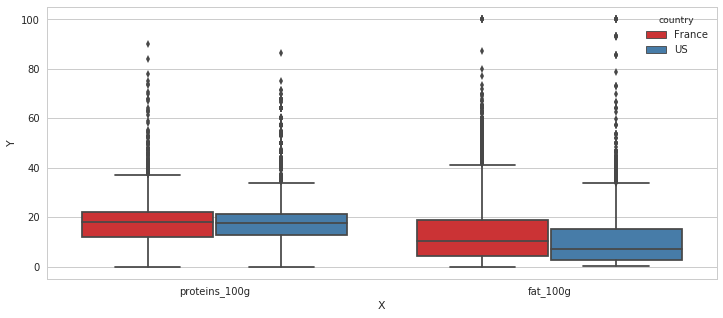

In [24]:
plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.boxplot(x="X",y ="Y", hue="country", data=data_boxplot, palette="Set1")

Here we see that when it comes to protein levels the food items in the US and in France are fairly equal. As for the fats it seems to be the case that france has more fat in the food than the US.